In [1]:
#General imports 
import sys
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
#Initialize relevant variables
M = {}
time_format = '%Y-%m-%d %H:%M:%S'

In [3]:
#Set matplotlib variables for prettier plots.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
fs = 36.

In [4]:
#Read the sleep data.
fpath = './../data/sleepdata.csv'
data = pd.read_csv(fpath, header=0, delimiter=';', index_col=False, low_memory=False)
print(data.head(n=5))

                 Start                  End Sleep quality Time in bed  \
0  2011-06-19 08:42:08  2011-06-19 13:22:13           51%        4:40   
1  2011-06-29 07:27:53  2011-06-29 12:39:43           57%        5:11   
2  2011-06-30 08:04:06  2011-06-30 10:51:15           34%        2:47   
3  2011-07-04 05:48:35  2011-07-04 12:27:00           73%        6:38   
4  2011-07-05 05:46:29  2011-07-05 10:42:00           51%        4:55   

   Wake up  Sleep Notes  Heart rate  Activity (steps)  
0      NaN          NaN         NaN                 0  
1      NaN          NaN         NaN                 0  
2      NaN          NaN         NaN                 0  
3      NaN          NaN         NaN                 0  
4      NaN          NaN         NaN                 0  


## Pre-process the data

In [6]:
#Create datetime objects and collect the bedtime hours.
bedtime_obj = np.array([datetime.strptime(T, time_format) for T in data['Start'].values])
waketime_obj = np.array([datetime.strptime(T, time_format) for T in data['End'].values])
M['bedtime'] = np.array([t.hour + t.minute/60. for t in bedtime_obj])
#Check if output contains any nan.
assert not np.isnan(M['bedtime']).any(), "Error: M['bedtime'] contains NaN"

print('Start date: ', (min(bedtime_obj)))
print('End date: ', (max(bedtime_obj)))

#Compute sleep duration.
duration = waketime_obj - bedtime_obj
M['duration'] = np.array([t.days*24. + t.seconds/3600. for t in duration])
assert not np.isnan(M['duration']).any(), "Error: M['duration'] contains NaN"

#Convert sleep quality to floats.
M['quality'] = [float(el.replace('%',''))/100. for el in data['Sleep quality']]

#Create an over-time quantity. Take earliest data and compute days since then.
ref_date = min(bedtime_obj)
time_prog = bedtime_obj - ref_date
M['time_prog'] = np.array([t.days + t.seconds/86400. for t in time_prog])
#print(ref_date.year, ref_date.month, ref_date.day)

#Make pandas dataframe out of the master dictionary M. Useful for seaborn lmplot function.
df = pd.DataFrame(M)

Start date:  2011-06-19 08:42:08
End date:  2015-01-26 01:41:36


## Histogram of bedtime hours

(array([ 24.,  54., 102.,  94.,  95.,  72.,  47.,  25.,  15.,   7.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

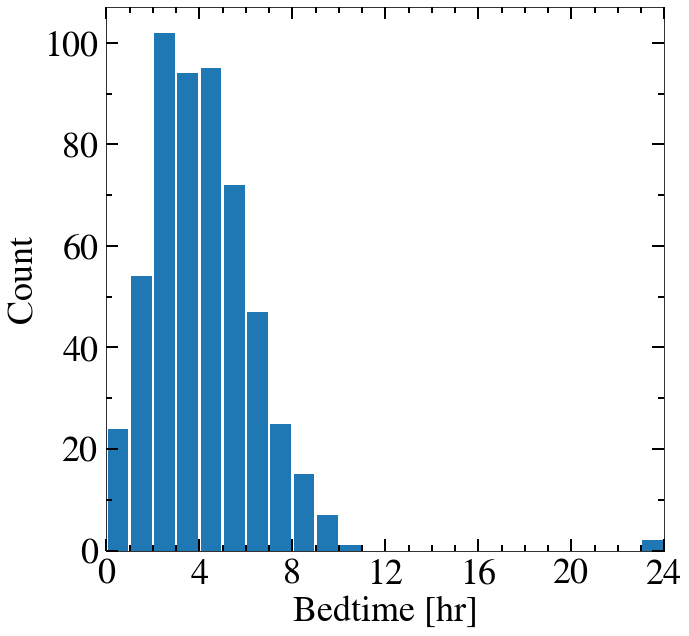

In [7]:
#First, make figure frame
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

xlabel = r'Bedtime [hr]'
ylabel = r'Count'
ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel(ylabel, fontsize=fs)
ax.set_xlim(0., 24.)
#ax.set_ylim(25., 175.)
ax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.xaxis.set_major_locator(MultipleLocator(4.))
ax.yaxis.set_minor_locator(MultipleLocator(10.))
ax.yaxis.set_major_locator(MultipleLocator(20.))

#Plot data.
ax.hist(M['bedtime'], bins=np.arange(0,24.1,1), rwidth=0.9)


## Sleep duration and quality as a function of bedtime hour.

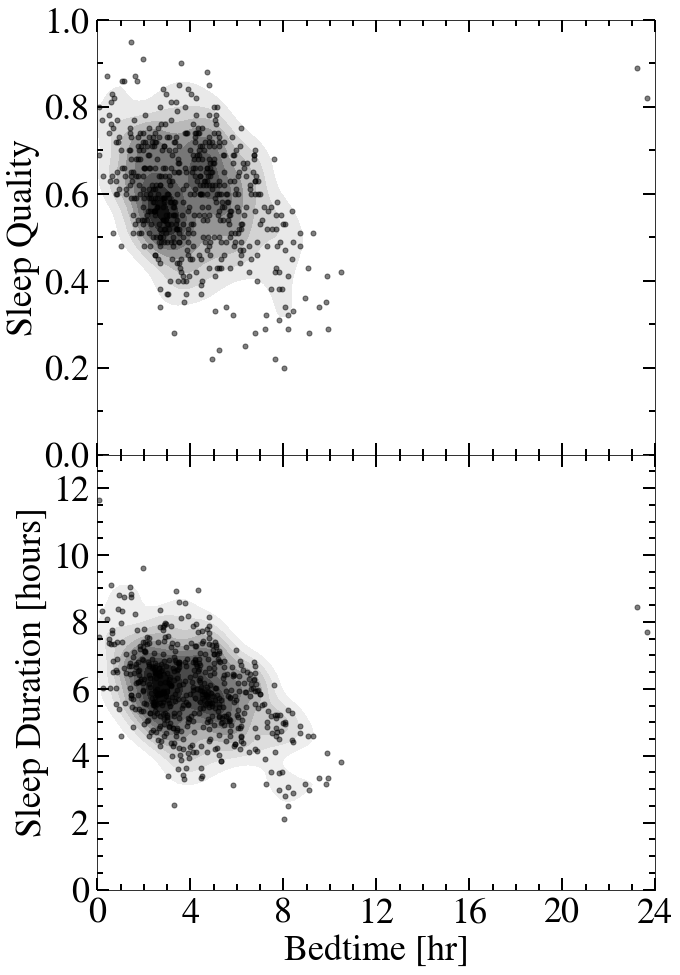

In [8]:
#Search for indicators.
#Plot sleep duration and quality as a function of bedtime.
plt.close()

fig = plt.figure(figsize=(10,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ylabel = r'Sleep Quality'
ax1.set_ylabel(ylabel, fontsize=fs)
ax1.set_xlim(0., 24.)
ax1.set_ylim(0., 1.)
ax1.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax1.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax1.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax1.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax1.xaxis.set_minor_locator(MultipleLocator(1.))
ax1.xaxis.set_major_locator(MultipleLocator(4.))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_major_locator(MultipleLocator(.2))
plt.setp(ax1.get_xticklabels(), visible=False)

xlabel = r'Bedtime [hr]'
ylabel = r'Sleep Duration [hours]'
ax2.set_xlabel(xlabel, fontsize=fs)
ax2.set_ylabel(ylabel, fontsize=fs)
ax2.set_xlim(0., 24.)
ax2.set_ylim(0., 13.)
ax2.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax2.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax2.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax2.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax2.xaxis.set_minor_locator(MultipleLocator(1.))
ax2.xaxis.set_major_locator(MultipleLocator(4.))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_major_locator(MultipleLocator(2.))

plt.subplots_adjust(hspace=0.)

#Plot data.

sns.kdeplot(M['bedtime'], M['quality'], ax=ax1, cmap="Greys",
            shade=True, shade_lowest=False)
sns.kdeplot(M['bedtime'], M['duration'], ax=ax2, cmap="Greys",
            shade=True, shade_lowest=False)

ax1.plot(M['bedtime'], M['quality'], ls='None', marker='o',
         c='k', alpha=0.5, markersize=5.)
ax2.plot(M['bedtime'], M['duration'], ls='None', marker='o',
         c='k', alpha=0.5, markersize=5.)


## Sleep quality relation to sleep duration

"\nxlabel = r'Sleep Duration [hours]'\nylabel = r'Sleep Quality'\nax.set_xlabel(xlabel, fontsize=fs)\nax.set_ylabel(ylabel, fontsize=fs)\n#ax.set_xlim(0., 24.)\n#ax.set_ylim(0., 1.)\nax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      \nax.tick_params(axis='x', which='major', labelsize=fs, pad=8)\nax.tick_params('both', length=12, width=2., which='major',\n                     direction='in', right=True, top=True)\nax.tick_params('both', length=6, width=2., which='minor',\n                     direction='in', right=True, top=True) \nax.xaxis.set_minor_locator(MultipleLocator(1.))\nax.xaxis.set_major_locator(MultipleLocator(4.))\nax.yaxis.set_minor_locator(MultipleLocator(0.1))\nax.yaxis.set_major_locator(MultipleLocator(.2))\n"

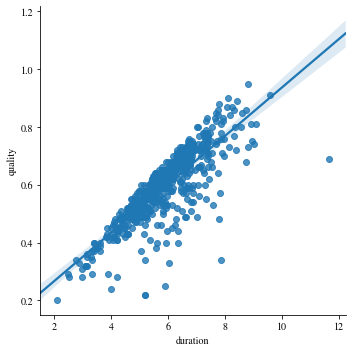

In [9]:
#Plot sleep quality as a function of duration
plt.close()

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)

#Plot data.

lm = sns.lmplot(x='duration', y='quality', data=df)
#ax = lm.axes[0,0]
#ax.plot(M['duration'], M['quality'], ls='None', marker='o',
#        c='k', alpha=0.5, markersize=5.)
'''
xlabel = r'Sleep Duration [hours]'
ylabel = r'Sleep Quality'
ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel(ylabel, fontsize=fs)
#ax.set_xlim(0., 24.)
#ax.set_ylim(0., 1.)
ax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.xaxis.set_major_locator(MultipleLocator(4.))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(.2))
'''

## Sleep duration and quality over time

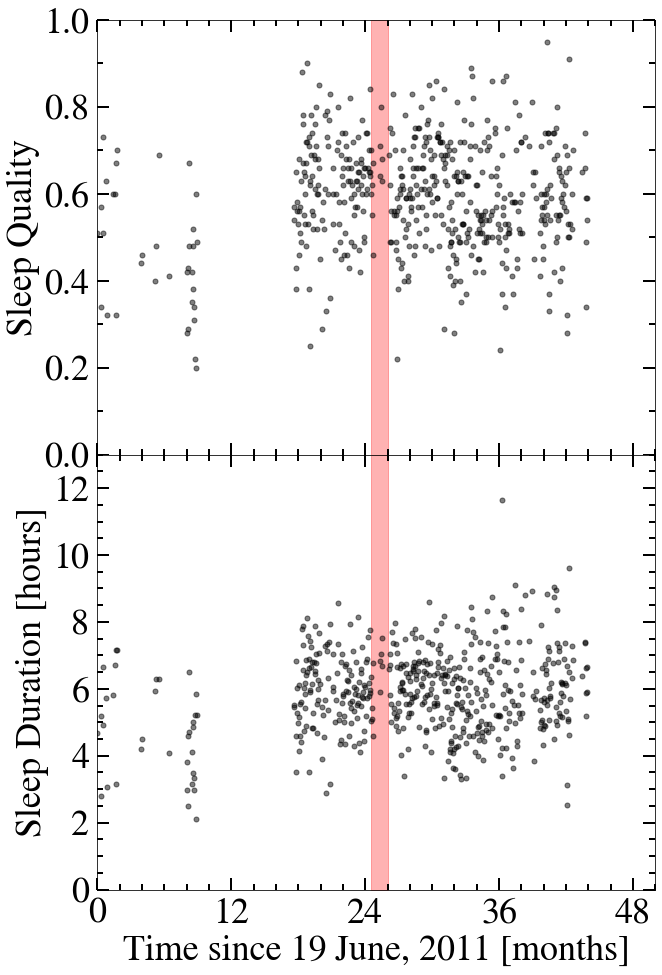

In [10]:
#Search for indicators.
#Plot sleep duration and quality as a function of bedtime.
plt.close()

fig = plt.figure(figsize=(10,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ylabel = r'Sleep Quality'
ax1.set_ylabel(ylabel, fontsize=fs)
ax1.set_xlim(0., 50.)
ax1.set_ylim(0., 1.)
ax1.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax1.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax1.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax1.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax1.xaxis.set_minor_locator(MultipleLocator(2.))
ax1.xaxis.set_major_locator(MultipleLocator(12.))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_major_locator(MultipleLocator(.2))
plt.setp(ax1.get_xticklabels(), visible=False)

xlabel = r'Time since ' + ref_date.strftime('%d %B, %Y') + ' [months]'
ylabel = r'Sleep Duration [hours]'
ax2.set_xlabel(xlabel, fontsize=fs)
ax2.set_ylabel(ylabel, fontsize=fs)
ax2.set_xlim(0., 50.)
ax2.set_ylim(0., 13.)
ax2.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax2.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax2.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax2.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax2.xaxis.set_minor_locator(MultipleLocator(2.))
ax2.xaxis.set_major_locator(MultipleLocator(12.))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_major_locator(MultipleLocator(2.))

plt.subplots_adjust(hspace=0.)

#Plot data.
ax1.plot(M['time_prog']/30., M['quality'], ls='None', marker='o',
         c='k', alpha=0.5, markersize=5.)
ax2.plot(M['time_prog']/30., M['duration'], ls='None', marker='o',
         c='k', alpha=0.5, markersize=5.)

#Highlight feature near Aug 2013.
ax1.fill_between(x=[24.5,26.], y1=[0.,0], y2=[1.,1.], color='r', alpha=.3)
ax2.fill_between(x=[24.5,26.], y1=[0.,0], y2=[13.,13.], color='r', alpha=.3)
